In [4]:
import gymnasium as gym
from IPython import display # IPython 라이브러리에 있는 display 모듈을 사용합니다.
import matplotlib.pyplot as plt # plot을 활용.

env = gym.make('HalfCheetah-v4', render_mode="rgb_array") # gym의 HalfCheetah 환경을 사용합니다.
observation = env.reset() # env.reset()을 통해 새로운 에피소드를 불러옵니다.
print(observation, env.observation_space)

(array([-0.01581851,  0.01394948,  0.09432059, -0.02220743, -0.08443507,
        0.01843362, -0.01104148,  0.08388753,  0.02843037,  0.11179543,
       -0.10562156, -0.05261237,  0.03778546, -0.00967248,  0.00377374,
       -0.0808292 , -0.03638296]), {}) Box(-inf, inf, (17,), float64)


In [3]:
env.action_space.sample(), env.action_space

(array([-0.3518966 ,  0.41138133,  0.65529424,  0.6013153 , -0.3820793 ,
         0.8078459 ], dtype=float32),
 Box(-1.0, 1.0, (6,), float32))

In [8]:
from stable_baselines3 import PPO, A2C, DQN
from stable_baselines3.common.env_util import make_vec_env

# Instantiate the env
# vec_env = make_vec_env(GoLeftEnv, n_envs=1, env_kwargs=dict(grid_size=10))

# Train the agent
model = PPO("MlpPolicy", env, verbose=1).learn(10000)


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -335     |
| time/              |          |
|    fps             | 2575     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -348        |
| time/                   |             |
|    fps                  | 2041        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010011222 |
|    clip_fraction        | 0.0989      |
|    clip_range           | 0.2         |
|    entropy_loss  

In [9]:
# Test the trained agent
# using the vecenv
obs = env.reset()[0]
n_steps = 200
frames = []
for step in range(n_steps):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, info, _ = env.step(action)
    if step % 10 == 0:
        print(f"Step {step + 1}:", "reward=", reward, "done=", done)
    
    screen = env.render() # 현재 환경을 'rgb_array'로 출력하여 screen 변수로 저장합니다.
    frames.append(screen) # screen을 frames에 추가합니다.
    env.step(env.action_space.sample()) # sample action을 통해 다음 step으로 진행합니다.

    if done:
        print("Goal reached!", "reward=", reward)
        break


Step 1: reward= 0.10195447314355915 done= False
Step 11: reward= -1.226942949720699 done= False
Step 21: reward= -0.15058287511365184 done= False
Step 31: reward= -0.12779963584674436 done= False
Step 41: reward= -0.064124197943358 done= False
Step 51: reward= -0.6269021156230449 done= False
Step 61: reward= -0.6659678834489735 done= False
Step 71: reward= 0.2890962575630452 done= False
Step 81: reward= -0.26418210501200257 done= False
Step 91: reward= -0.22754597829034626 done= False
Step 101: reward= -0.22343105231907695 done= False
Step 111: reward= -0.42193327232909095 done= False
Step 121: reward= -0.24304412219472127 done= False
Step 131: reward= -0.2524727241284115 done= False
Step 141: reward= -0.2960303822120121 done= False
Step 151: reward= 0.9630686179586583 done= False
Step 161: reward= 0.66588722397456 done= False
Step 171: reward= -0.8038312326025665 done= False
Step 181: reward= -0.17437552335714662 done= False
Step 191: reward= 0.4947398700128186 done= False


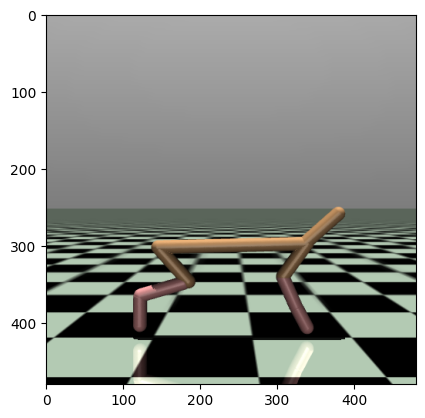

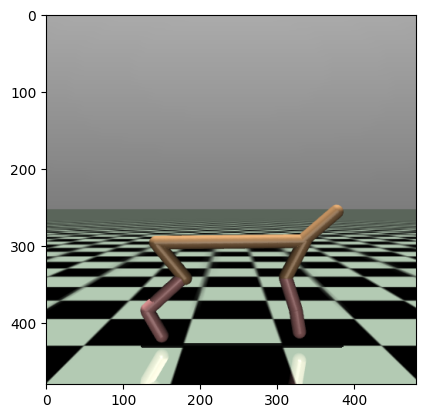

In [12]:
# 장수가 많을 수록 점점 느려져서 1/3 frame만 출력
for frame in frames[::3]:    
    display.clear_output(wait=True)
    display.display(plt.gcf()) 
    plt.imshow(frame) 
    

In [4]:

plt.close() # 종료 후 plot을 닫습니다.
env.close() # 종료 후 env를 닫습니다.